<a href="https://colab.research.google.com/github/Hjhirp/Face-Mask-Emotion-Classification/blob/main/Notebook/Main/FaceMask_Image_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import os
import shutil

import numpy as np
import pandas as pd
import tensorflow as tf

# from tensorflow import keras
# from matplotlib import pyplot as plt
# from keras.preprocessing.image import load_img, ImageDataGenerator
# from keras.models import Sequential, Model
# from keras.layers import Input, Flatten, Dense, Conv2D, MaxPooling2D, MaxPool2D, concatenate, BatchNormalization, Dropout, AveragePooling2D, Activation
# from keras.activations import relu, sigmoid, softmax
# # from keras.utils import plot_model, save_img
# from keras.losses import CategoricalCrossentropy
# from keras.optimizers import adam, SGD
# # from tensorflow.keras.metrics import CategoricalCrossentropy
# from keras.callbacks import EarlyStopping, ReduceLROnPlateau
# from keras.preprocessing.image import load_img, img_to_array

In [ ]:
!nvidia-smi

NVIDIA-SMI has failed because it couldn't communicate with the NVIDIA driver. Make sure that the latest NVIDIA driver is installed and running.



In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
%cd '/content/drive/MyDrive/Face Mask Paper/MaskTheFace'

/content/drive/MyDrive/Face Mask Paper/MaskTheFace


In [ ]:
%cd 'datasets'

/content/drive/MyDrive/Face Mask Paper/MaskTheFace/datasets


In [ ]:
# os.mkdir('Training_truncated_data')
# os.mkdir('Val_truncated_data')

## Moving top N images

In [ ]:
dir_list = os.listdir('X_train')
%cd 'val_train'

for i in dir_list:
  os.mkdir(i)

%cd ..

/content/drive/MyDrive/Face Mask Paper/MaskTheFace/datasets/val_train
/content/drive/MyDrive/Face Mask Paper/MaskTheFace/datasets


In [ ]:
import random
for dir_name in os.listdir('X_train'):
  source_ = 'X_train/'+dir_name
  source_folder = 'X_train/'+dir_name+'/'
  dest_folder = 'val_train/'+dir_name+'/'
  file_list = random.sample(os.listdir(source_),4500)
  for file in file_list:
    source = source_folder + file
    destination = dest_folder + file
    # move file
    shutil.move(source, destination)
  print('Moved:', dir_name)

Moved: happy_masked
Moved: angry_masked
Moved: neutral_masked
Moved: sad_masked
Moved: surprise_masked


In [ ]:
!pwd

/content/drive/MyDrive/Face Mask Paper/MaskTheFace/datasets


# File management

In [ ]:
list_ = os.listdir('Val_truncated_data')

In [ ]:
%cd 'Val_truncated_data'

/content/drive/MyDrive/Face Mask Paper/MaskTheFace/datasets/Val_truncated_data


In [ ]:
list2_ = []
for i in list_:
  list2_.append(i.split('_'))

list2_

[['angry'],
 ['disgust'],
 ['fear'],
 ['happy'],
 ['neutral'],
 ['sad'],
 ['surprise'],
 ['disgust', 'masked'],
 ['.ipynb', 'checkpoints']]

In [ ]:
# os.mkdir('Extra')
list3_ = []
for i in list2_:
  if 'masked' not in i:
    list3_.append(i)
list3_

[['angry'],
 ['disgust'],
 ['fear'],
 ['happy'],
 ['neutral'],
 ['sad'],
 ['surprise'],
 ['.ipynb', 'checkpoints']]

In [ ]:
!pwd

/content/drive/MyDrive/Face Mask Paper/MaskTheFace/datasets/Val_truncated_data


In [ ]:
dir_list = []
for i in list3_:
  for k in i:
    dir_list.append(k)

import shutil
for i in dir_list:
  source_folder = i
  dest_folder = 'Extra_val/'+i
  shutil.move(source_folder, dest_folder)

In [ ]:
source_folder = '.ipynb_checkpoints'
dest_folder = 'Extra/'+'.ipynb_checkpoints'
shutil.move(source_folder, dest_folder)

'Extra/.ipynb_checkpoints'

In [ ]:
source_folder = 'disgust_masked'
dest_folder = 'Extra_val/'+'disgust_masked'
shutil.move(source_folder, dest_folder)

'Extra_val/disgust_masked'

In [ ]:
%cd ..

/content/drive/MyDrive/Face Mask Paper/MaskTheFace/datasets


In [ ]:
source_folder = 'Val_truncated_data/Extra'
dest_folder = 'datasets/'
shutil.move(source_folder, dest_folder)

'datasets/Extra'

#Training

In [ ]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.utils.np_utils import to_categorical
from keras.layers import Conv2D,MaxPooling2D, MaxPool2D , Dense,Activation, Flatten,Dropout,BatchNormalization
from tensorflow import keras
from keras.callbacks import ReduceLROnPlateau
from keras.preprocessing.image import load_img, ImageDataGenerator
from tensorflow.keras.optimizers import Adam,SGD,RMSprop


In [ ]:
#defining global variables

num_class = 5

In [ ]:
train_datagen = ImageDataGenerator(featurewise_center=False,
                                  samplewise_center=False,
                                  featurewise_std_normalization=False,
                                  samplewise_std_normalization=False,
                                  zca_whitening=False,
                                  rotation_range=10,
                                  zoom_range=0.1,
                                  width_shift_range=0.1,
                                  height_shift_range=0.1,
                                  horizontal_flip=False,
                                  vertical_flip=False
                                  )

train_generator = train_datagen.flow_from_directory(
    directory=r"./X_train/",
    target_size=(48, 48),
    color_mode="grayscale",
    batch_size=128,
    class_mode="categorical",
    shuffle=True,
    seed=42
)

Found 50990 images belonging to 5 classes.


In [ ]:
train_datagen = ImageDataGenerator(featurewise_center=False,
                                  samplewise_center=False,
                                  featurewise_std_normalization=False,
                                  samplewise_std_normalization=False,
                                  zca_whitening=False,
                                  rotation_range=10,
                                  zoom_range=0.1,
                                  width_shift_range=0.1,
                                  height_shift_range=0.1,
                                  horizontal_flip=False,
                                  vertical_flip=False
                                  )

val_generator = train_datagen.flow_from_directory(
    directory=r"./val_train/",
    target_size=(48, 48),
    color_mode="grayscale",
    batch_size=128,
    class_mode="categorical",
    shuffle=True,
    seed=42
)

Found 25000 images belonging to 5 classes.


In [ ]:
print(train_generator.class_indices)

{'angry_masked': 0, 'happy_masked': 1, 'neutral_masked': 2, 'sad_masked': 3, 'surprise_masked': 4}


In [ ]:
reduceLROnPlateau = ReduceLROnPlateau(monitor='val_accuracy',
                                     patience=3,
                                     verbose=1,
                                     factor=0.1,
                                     min_lr=0.00001)
early_stopping_callback = keras.callbacks.EarlyStopping(monitor='val_accuracy', patience=20, restore_best_weights=True)

In [ ]:
def my_model3():
    model=Sequential()
    model.add( Conv2D(filters=32, kernel_size=(3,3), strides=(1,1), padding='valid', activation=None, use_bias=False, input_shape=(48,48,1)) )
    model.add(BatchNormalization())
    model.add(Activation('relu'))

    model.add( Conv2D(filters=48, kernel_size=(3,3), strides=(1,1), padding='valid', activation=None, use_bias=False) )
    model.add(BatchNormalization())
    model.add(Activation('relu'))

    model.add( Conv2D(filters=64, kernel_size=(3,3), strides=(1,1), padding='valid', activation=None, use_bias=False) )
    model.add(BatchNormalization())
    model.add(Activation('relu'))

    model.add( Conv2D(filters=80, kernel_size=(3,3), strides=(1,1), padding='valid', activation=None, use_bias=False) )
    model.add(BatchNormalization())
    model.add(Activation('relu'))

    model.add( Conv2D(filters=96, kernel_size=(3,3), strides=(1,1), padding='valid', activation=None, use_bias=False) )
    model.add(BatchNormalization())
    model.add(Activation('relu'))

    model.add( Conv2D(filters=112, kernel_size=(3,3), strides=(1,1), padding='valid', activation=None, use_bias=False) )
    model.add(BatchNormalization())
    model.add(Activation('relu'))

    model.add( Conv2D(filters=128, kernel_size=(3,3), strides=(1,1), padding='valid', activation=None, use_bias=False) )
    model.add(BatchNormalization())
    model.add(Activation('relu'))

    model.add( Conv2D(filters=144, kernel_size=(3,3), strides=(1,1), padding='valid', activation=None, use_bias=False) )
    model.add(BatchNormalization())
    model.add(Activation('relu'))

    model.add( Conv2D(filters=160, kernel_size=(3,3), strides=(1,1), padding='valid', activation=None, use_bias=False) )
    model.add(BatchNormalization())
    model.add(Activation('relu'))

    model.add( Conv2D(filters=176, kernel_size=(3,3), strides=(1,1), padding='valid', activation=None, use_bias=False) )
    model.add(BatchNormalization())
    model.add(Activation('relu'))

    model.add(Flatten())

    model.add(Dense(units=num_class))
    model.add(BatchNormalization())
    model.add(Activation('softmax'))
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

def my_model5():
    model=Sequential()
    model.add( Conv2D(filters=32, kernel_size=(5,5), strides=(1,1), padding='valid', activation=None, use_bias=False, input_shape=(48,48,1)) )
    model.add(BatchNormalization())
    model.add(Activation('relu'))

    model.add( Conv2D(filters=48, kernel_size=(5,5), strides=(1,1), padding='valid', activation=None, use_bias=False) )
    model.add(BatchNormalization())
    model.add(Activation('relu'))

    model.add( Conv2D(filters=64, kernel_size=(5,5), strides=(1,1), padding='valid', activation=None, use_bias=False) )
    model.add(BatchNormalization())
    model.add(Activation('relu'))

    model.add( Conv2D(filters=80, kernel_size=(5,5), strides=(1,1), padding='valid', activation=None, use_bias=False) )
    model.add(BatchNormalization())
    model.add(Activation('relu'))

    model.add( Conv2D(filters=96, kernel_size=(3,3), strides=(1,1), padding='valid', activation=None, use_bias=False) )
    model.add(BatchNormalization())
    model.add(Activation('relu'))

    model.add( Conv2D(filters=112, kernel_size=(5,5), strides=(1,1), padding='valid', activation=None, use_bias=False) )
    model.add(BatchNormalization())
    model.add(Activation('relu'))

    model.add( Conv2D(filters=128, kernel_size=(5,5), strides=(1,1), padding='valid', activation=None, use_bias=False) )
    model.add(BatchNormalization())
    model.add(Activation('relu'))

    model.add(Flatten())

    model.add(Dense(units=num_class))
    model.add(BatchNormalization())
    model.add(Activation('softmax'))
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

def my_model7():
    model=Sequential()
    model.add( Conv2D(filters=32, kernel_size=(7,7), strides=(1,1), padding='valid', activation=None, use_bias=False, input_shape=(48,48,1)) )
    model.add(BatchNormalization())
    model.add(Activation('relu'))

    model.add( Conv2D(filters=48, kernel_size=(7,7), strides=(1,1), padding='valid', activation=None, use_bias=False) )
    model.add(BatchNormalization())
    model.add(Activation('relu'))

    model.add( Conv2D(filters=64, kernel_size=(7,7), strides=(1,1), padding='valid', activation=None, use_bias=False) )
    model.add(BatchNormalization())
    model.add(Activation('relu'))


    model.add(Flatten())

    model.add(Dense(units=num_class))
    model.add(BatchNormalization())
    model.add(Activation('softmax'))
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

In [ ]:
model3=my_model3()
model5=my_model5()
model7=my_model7()

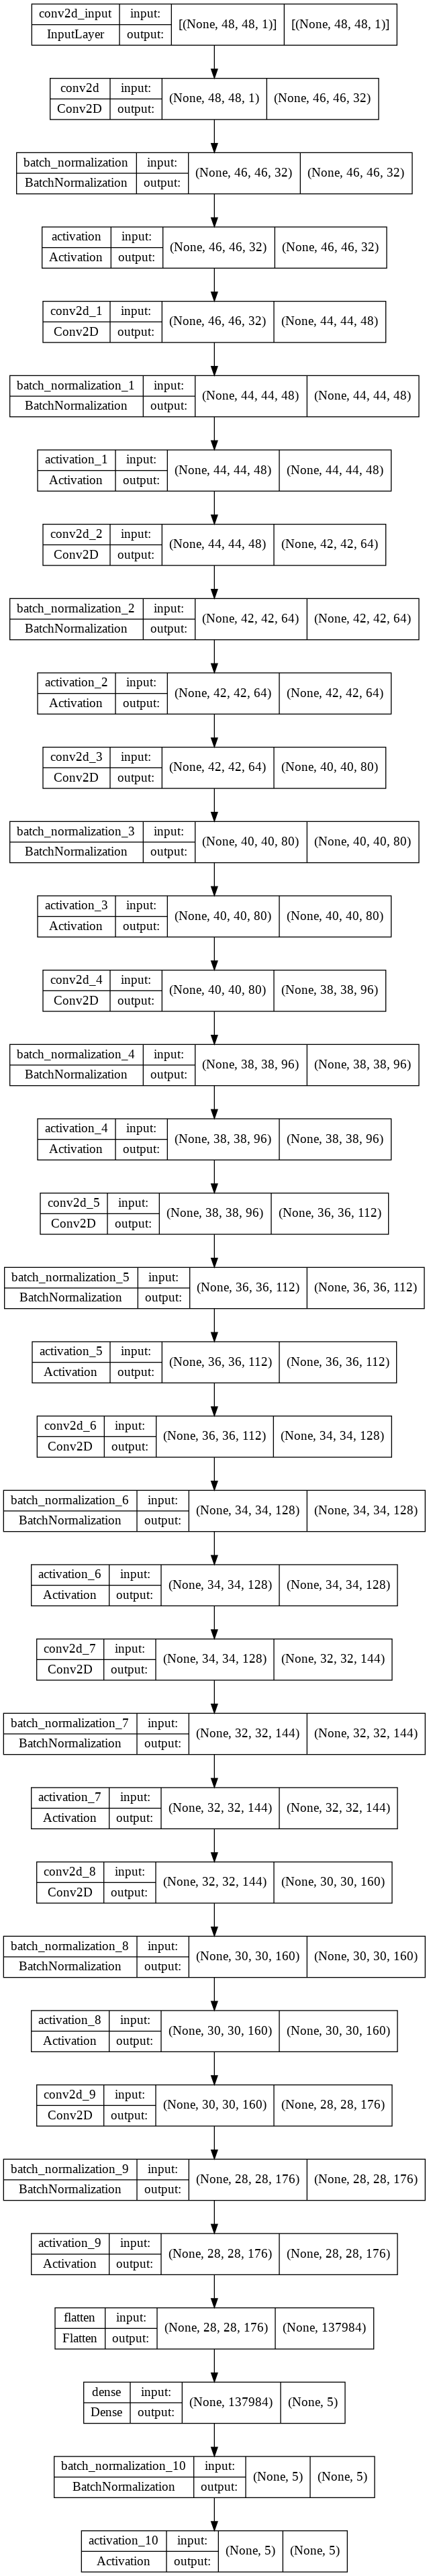

In [ ]:
tf.keras.utils.plot_model(model3,show_shapes=True)

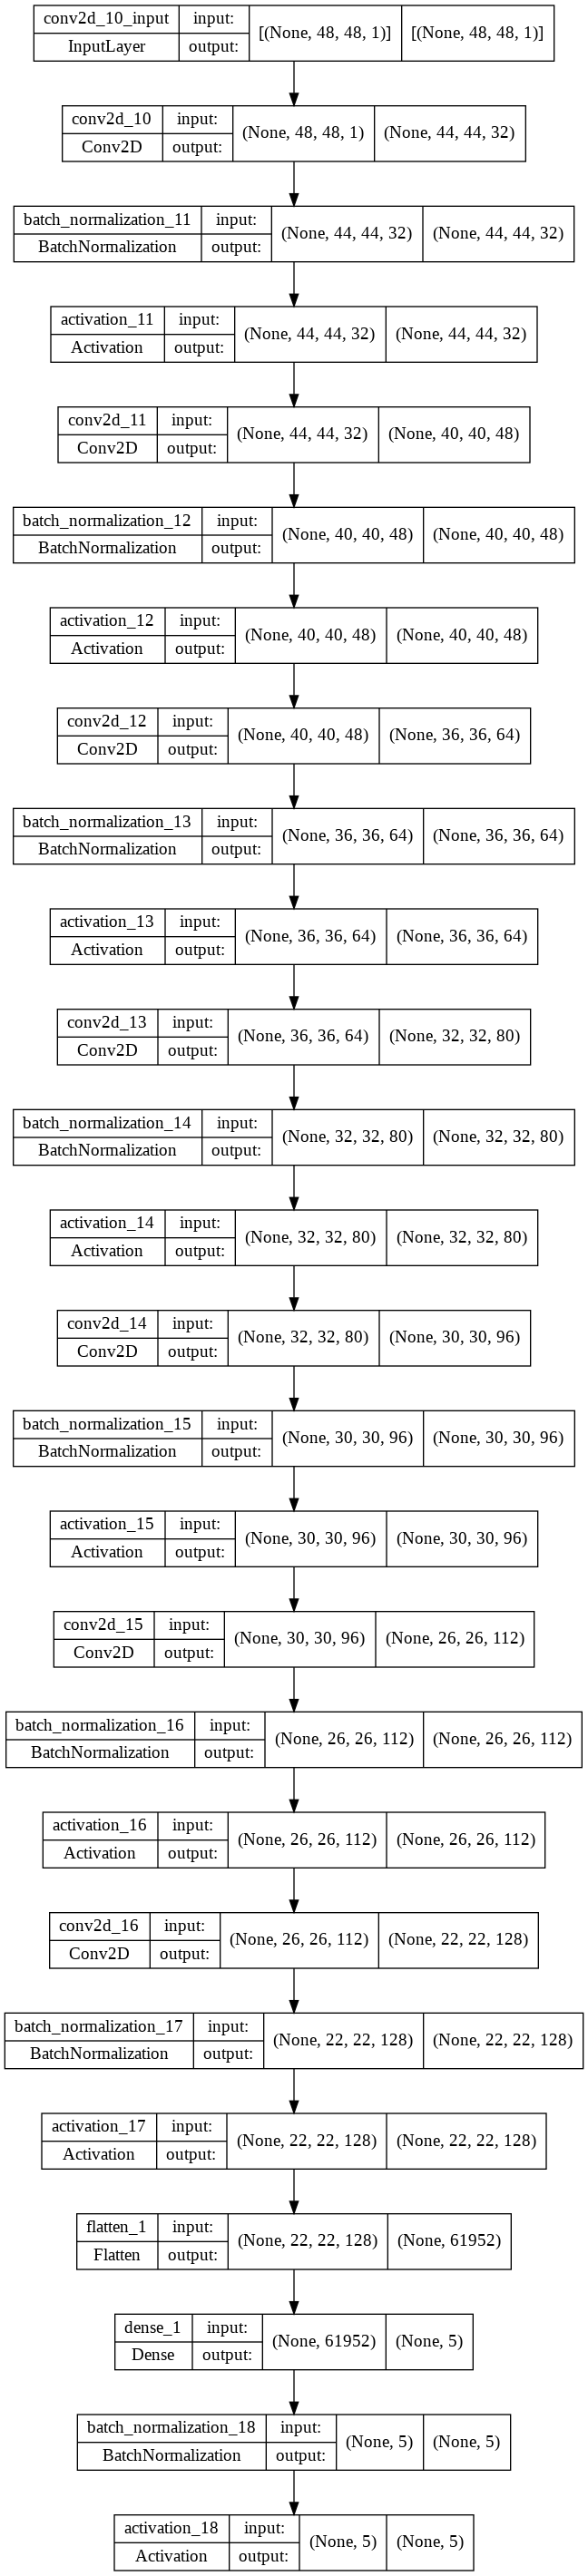

In [ ]:
tf.keras.utils.plot_model(model5,show_shapes=True)

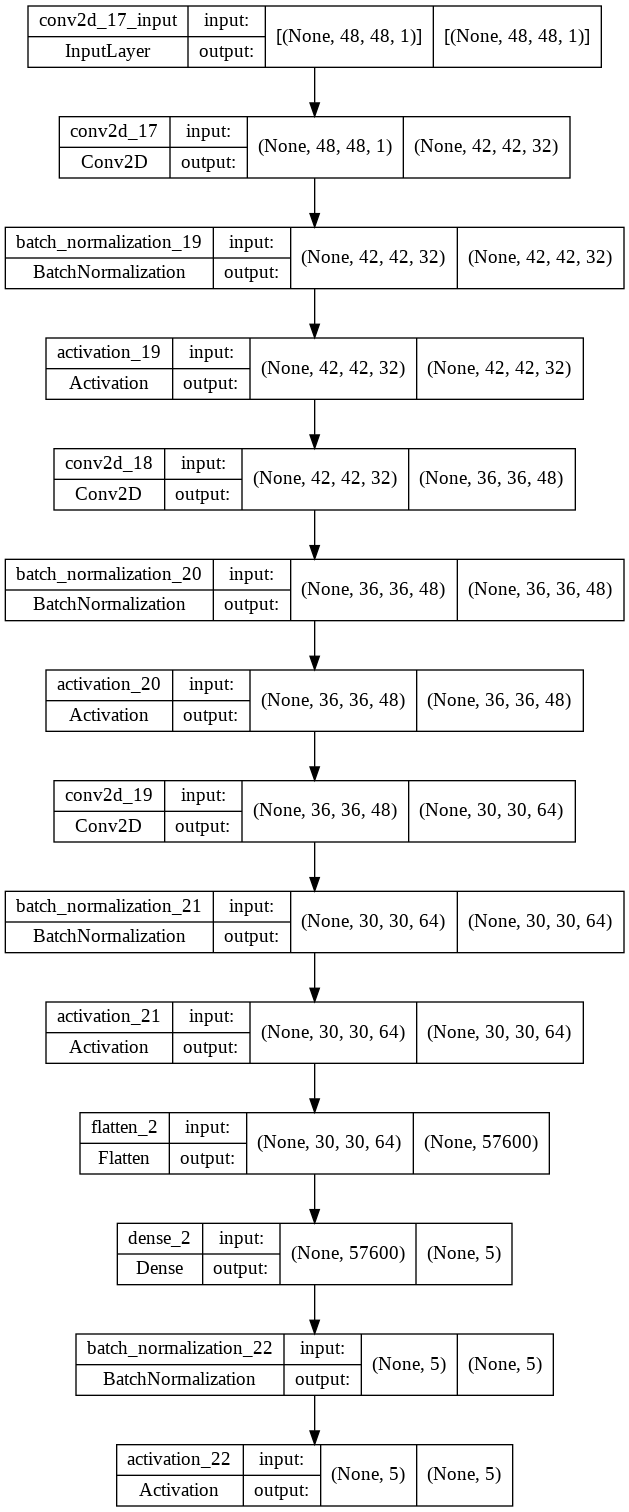

In [ ]:
tf.keras.utils.plot_model(model7,show_shapes=True)

In [ ]:
hiistory3 = model3.fit(train_generator, epochs=100,  callbacks=[early_stopping_callback, reduceLROnPlateau],workers=8, use_multiprocessing=True, verbose=1, validation_data=val_generator)

Epoch 1/100
  2/399 [..............................] - ETA: 2:08:36 - loss: 1.8968 - accuracy: 0.2344 

Process Keras_worker_ForkPoolWorker-5:
Process Keras_worker_ForkPoolWorker-4:
Process Keras_worker_ForkPoolWorker-6:
Process Keras_worker_ForkPoolWorker-1:
Process Keras_worker_ForkPoolWorker-3:
Process Keras_worker_ForkPoolWorker-7:
Traceback (most recent call last):
Traceback (most recent call last):
Process Keras_worker_ForkPoolWorker-8:
Process Keras_worker_ForkPoolWorker-2:
  File "/usr/lib/python3.7/multiprocessing/process.py", line 297, in _bootstrap
    self.run()
  File "/usr/lib/python3.7/multiprocessing/process.py", line 297, in _bootstrap
    self.run()
  File "/usr/lib/python3.7/multiprocessing/process.py", line 99, in run
    self._target(*self._args, **self._kwargs)
Traceback (most recent call last):
Traceback (most recent call last):
  File "/usr/lib/python3.7/multiprocessing/process.py", line 297, in _bootstrap
    self.run()
  File "/usr/lib/python3.7/multiprocessing/process.py", line 99, in run
    self._target(*self._args, **self._kwargs)
Traceback (most recent call

KeyboardInterrupt: ignored

In [ ]:
hiistory5 = model5.fit(train_generator, epochs=100,  callbacks=[early_stopping_callback, reduceLROnPlateau],workers=8, use_multiprocessing=True, verbose=1, validation_data=val_generator)

Epoch 1/100
32/32 [==============================] - 19s 423ms/step - loss: 1.3480 - accuracy: 0.4145 - val_loss: 11.5628 - val_accuracy: 0.2020 - lr: 0.0010
Epoch 2/100
32/32 [==============================] - 14s 348ms/step - loss: 1.1281 - accuracy: 0.5210 - val_loss: 2.8441 - val_accuracy: 0.2020 - lr: 0.0010
Epoch 3/100
32/32 [==============================] - 13s 338ms/step - loss: 1.0936 - accuracy: 0.5378 - val_loss: 2.9452 - val_accuracy: 0.2480 - lr: 0.0010
Epoch 4/100
32/32 [==============================] - 14s 365ms/step - loss: 1.0440 - accuracy: 0.5627 - val_loss: 1.8114 - val_accuracy: 0.2890 - lr: 0.0010
Epoch 5/100
32/32 [==============================] - 13s 356ms/step - loss: 1.0116 - accuracy: 0.5820 - val_loss: 1.9275 - val_accuracy: 0.3320 - lr: 0.0010
Epoch 6/100
32/32 [==============================] - 12s 325ms/step - loss: 0.9846 - accuracy: 0.6012 - val_loss: 1.9082 - val_accuracy: 0.2910 - lr: 0.0010
Epoch 7/100
32/32 [==============================] - 14s 

In [ ]:
hiistory7 = model7.fit(train_generator, epochs=100,  callbacks=[early_stopping_callback, reduceLROnPlateau],workers=8, use_multiprocessing=True, verbose=1, validation_data=val_generator)

Epoch 1/100
32/32 [==============================] - 14s 324ms/step - loss: 1.4273 - accuracy: 0.4020 - val_loss: 22.7829 - val_accuracy: 0.1990 - lr: 0.0010
Epoch 2/100
32/32 [==============================] - 13s 305ms/step - loss: 1.1700 - accuracy: 0.5070 - val_loss: 3.1110 - val_accuracy: 0.3020 - lr: 0.0010
Epoch 3/100
32/32 [==============================] - 12s 301ms/step - loss: 1.1214 - accuracy: 0.5315 - val_loss: 1.6859 - val_accuracy: 0.3010 - lr: 0.0010
Epoch 4/100
21/32 [==================>...........] - ETA: 1s - loss: 1.1216 - accuracy: 0.5324

In [ ]:
def model_fer_kaggle():
    #building model with 7 classes


  no_of_classes = 5

  model = Sequential()

  #1st CNN layer
  model.add(Conv2D(64,(3,3),padding = 'same',input_shape = (48,48,1)))
  model.add(BatchNormalization())
  model.add(Activation('relu'))
  model.add(MaxPooling2D(pool_size = (2,2)))
  model.add(Dropout(0.25))

  #2nd CNN layer
  model.add(Conv2D(128,(5,5),padding = 'same'))
  model.add(BatchNormalization())
  model.add(Activation('relu'))
  model.add(MaxPooling2D(pool_size = (2,2)))
  model.add(Dropout (0.25))

  #3rd CNN layer
  model.add(Conv2D(512,(3,3),padding = 'same'))
  model.add(BatchNormalization())
  model.add(Activation('relu'))
  model.add(MaxPooling2D(pool_size = (2,2)))
  model.add(Dropout (0.25))

  #4th CNN layer
  model.add(Conv2D(512,(3,3), padding='same'))
  model.add(BatchNormalization())
  model.add(Activation('relu'))
  model.add(MaxPooling2D(pool_size=(2, 2)))
  model.add(Dropout(0.25))

  model.add(Flatten())

  #Fully connected 1st layer
  model.add(Dense(256))
  model.add(BatchNormalization())
  model.add(Activation('relu'))
  model.add(Dropout(0.25))


  # Fully connected layer 2nd layer
  model.add(Dense(512))
  model.add(BatchNormalization())
  model.add(Activation('relu'))
  model.add(Dropout(0.25))

  model.add(Dense(no_of_classes, activation='softmax'))



  opt = Adam(lr = 0.0001)
  model.compile(optimizer=opt,loss='categorical_crossentropy', metrics=['accuracy'])
  model.summary()
  return model

In [ ]:
model4 = model_fer_kaggle()

In [ ]:
hiistory4 = model4.fit(train_generator, epochs=100,  callbacks=[early_stopping_callback, reduceLROnPlateau],workers=8, use_multiprocessing=True, verbose=1, validation_data=val_generator)